# 2 Ambiguity Sets
This brief chapter covers how to produce the ambiguity sets (Figure 4 in the main paper). Recall the restriction from Chapter 1.3 of the notebook:

$$
(z_1-\bar{z}_1) \omega \left[\hat{\beta}_1(z_1-\bar{z}_1) + \sigma_1 \cdot h\right] + \frac{|\sigma_1|^2}{2} \omega - \frac{q^2}{2} + \frac{h \cdot h}{2} \leq 0
$$

Where:

$$
H_t := \psi(Z_t^1) = \psi_0 + \psi_1 (Z_t^1 - \bar{z})
$$

Substituting $H_t$ into the first equation:

$$
(z_1-\bar{z}_1) \omega \left[\hat{\beta}_1(z_1-\bar{z}_1) + \sigma_1 \cdot (\eta_0 + \eta_1(z_1-\bar{z}_1))\right] + \frac{|\sigma_1|^2}{2} \omega - \frac{q^2}{2} + \frac{|\eta_0 + \eta_1(z_1-\bar{z}_1)|^2}{2} \leq 0
$$

By fixing $(\omega,q)$, we trace out a set of parametric models with the same relative entropy. Specifically, we trace out a contour set for $\eta_0,\eta_1$ which in turn allows us to trace out a set of values for $\alpha_k,\beta_k,\alpha_z,\beta_z$. Following Hansen and Sargent (2020), for ambiguity over the slope parameters only, we set:

$$
\omega = \frac{q^2}{|\sigma_z|^2}
$$

For ambiguity over slope and constant parameters, we set:

$$
\omega = \frac{q^2}{2|\sigma_z|^2}
$$

Thus we need to specify the following inputs:

```{list-table}
:header-rows: 1

* - Input
  - Notation in paper
  - Description
  - Parameter used in paper
* - `baseline_beta_z`
  - $\beta_1$
  - Persistence of $Z_1$
  - 0.056
* - `baseline_alpha_z`
  - $\mu_1$
  - Drift of $Z_1$
  - 0.0
* - `baseline_eta`
  - $\eta$
  - Depreciation
  - -0.04
* - `baseline_beta_k`
  - $\beta_k$
  - Loading factor on the capital stock in the long run risk process
  - 0.04
* - `q`
  - $q$
  - Relative entropy constraint
  - 
* - `twoparameter`
  -
  - `1` if ambiguity is restricted to the slope parameters; `0` if ambiguity is extended to the slope and constant parameters
  - 
```

We can then import the necessary libraries and set the inputs:

In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True
from scipy.optimize import bisect
os.chdir("src/2")
from ambiguity_sets import main
os.chdir("../..")


For our example, we extend ambiguity to all four parameters and set $q=0.2$.

In [2]:
baseline_beta_z = 0.056
baseline_alpha_z = 0.0
baseline_eta = 0.04
baseline_beta_k = 0.04
q = 0.2
twoparameter = 0


We can now run the main function:

In [3]:
ambiguity_set = main(baseline_beta_z,baseline_alpha_z,baseline_eta,baseline_beta_k,q,twoparameter)

rho_2 for all four parameters = 8.14251352878623


We plot the results here:

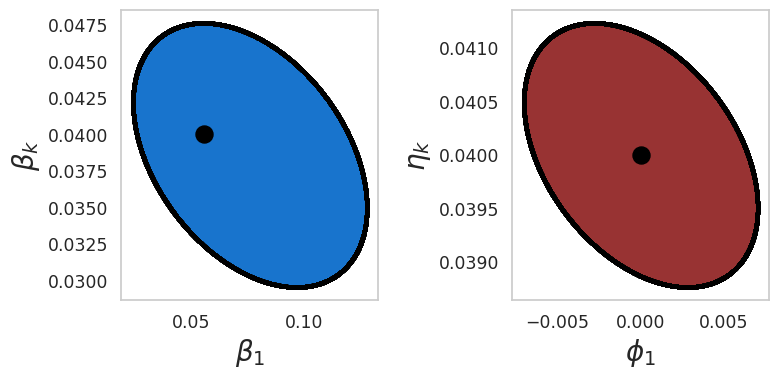

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# First subplot
contour, alpha_zs, alpha_ks, beta_zs, beta_ks = ambiguity_set
plt.subplot(1, 2, 1)
plt.fill(beta_zs, beta_ks, color='#1874CD', linewidth=2)
plt.ylabel('$\\beta_k$', fontsize='20')
plt.xlabel('$\\beta_1$', fontsize='20')
plt.scatter(beta_zs, beta_ks, color='black', s=4)
plt.scatter(baseline_beta_z, baseline_beta_k, color='black', s=150)
plt.grid(False)

# Second subplot
plt.subplot(1, 2, 2)

plt.fill(alpha_zs, alpha_ks, color='#983333', linewidth=2)
plt.ylabel('$\\eta_k$', fontsize='20')
plt.xlabel('$\\phi_1$', fontsize='20')
plt.scatter(alpha_zs, alpha_ks, color='black', s=4)
plt.scatter(baseline_alpha_z, baseline_eta, color='black', s=150)
plt.grid(False)

plt.tight_layout()
